In [1]:
import numpy as np
import pandas as pd
import re
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
flats_chd = pd.read_csv('data/clean/v2/chd/flats-chd-with-extra-address.csv')
flats_pkl = pd.read_csv('data/clean/v2/pkl/flats-pkl-with-extra-address.csv')
flats_mhl = pd.read_csv('data/clean/v2/mhl/flats-mhl-with-extra-address.csv')

In [3]:
ind_house_chd = pd.read_csv('data/clean/v2/chd/ind-house-chd-with-extra-address.csv')
ind_house_pkl = pd.read_csv('data/clean/v2/pkl/ind-house-pkl-with-extra-address.csv')
ind_house_mhl = pd.read_csv('data/clean/v2/mhl/ind-house-mhl-with-extra-address.csv')

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
flats_chd.head(1)

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,S73653895,3BHK 2Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,The CHD Police CHS,Sector 51 Chandigarh,Chandigarh,"The CHD Police CHS, Sector 51 Chandigarh, Chan...","Sector 51 Chandigarh, Chandigarh, India","17,723 per sq.ft.",Carpet area: 1072 (99.59 sq.m.) sq.ft.,sq.ft.,3,2,2,Others,South-West,1,3,"Main Road,Park/Garden",Old,Granite,Yes,Furnished,1,0,NaN,"Borewell/Tank,Municipal corporation",NaN,No,No,Redefine luxury with a world of comfort at a 3...,"['1 AC', '1 Modular Kitchen', '1 Chimney', '1 ...","['Maintenance Staff', 'Water Storage', 'Park',...",1.9


In [6]:
flats_pkl.head(1)

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,W76639483,3BHK 3Baths,Builder Floor,https://www.99acres.com/3-bhk-bedroom-independ...,DLF The Valley,Pinjore,Panchkula,"DLF The Valley, Sector 3 Panchkula, Panchkula,...","Sector 3 Panchkula, Panchkula, Haryana","8,000 per sq.ft.",Super Built up area 1750(162.58 sq.m.) sq.ft.,sq.ft.,3,3,3,Store Room,East,2,2,Main Road,ModOld,Ceramic,Yes,Unfurnished,0,1,80.0,24*7 Water,Full,No,No,Located in the foothills of the shivalik range...,NaN,"['Security / Fire Alarm', 'Maintenance Staff',...",1.4


In [7]:
flats_mhl.head(1)

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,A76548347,1BHK 1Bath,Flat/Apartment,https://www.99acres.com/1-bhk-bedroom-apartmen...,NaN,Sector 115 Mohali,Mohali,"silver wood sector 115 mohali, Sector 115 Moha...","Sector 115 Mohali, Mohali, Punjab","3,816 per sq.ft.",Carpet area: 600 (55.74 sq.m.) sq.ft.,sq.ft.,1,1,1,Pooja Room,East,2,2,"Others,Park/Garden",New,Concrete,Yes,Furnished,1,0,40.0,"24*7 Water,Municipal corporation",NaN,No,No,70 gaz 1bhk flat for sale in sector-115 mohali...,"['1 Bed', '1 Sofa', '1 Modular Kitchen', '1 Ch...","['Maintenance Staff', 'False Ceiling Lighting'...",0.229


In [8]:
ind_house_chd.head(1)

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,R76627967,7Bedrooms 7Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 15 Chandigarh,Chandigarh,"Sector 15 Chandigarh, Chandigarh, India","Sector 15 Chandigarh, Chandigarh, India","1,40,000 per sq.yards",Plot area 2000(1672.25 sq.m.) sq.yards,sq.yards,7,7,4,Servant Room,North-West,2,Others,Old,Marble,No,Semifurnished,3,3,40.0,"24*7 Water,Municipal corporation",NaN,Yes,Yes,This 7 bhk house for sale in sector 15 chandig...,"['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Ch...","['Feng Shui / Vaastu Compliant', 'Water purifi...",28.0


In [9]:
ind_house_pkl.head(1)

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,J74797529,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 9 Panchkula,Panchkula,"RESIDENTIAL BUILT UP BRAND NEW HOUSE, Sector 9...","Pkl, Sector 9 Panchkula, Panchkula, Haryana","2,90,000 per sq.yards",Plot area 250(209.03 sq.m.) sq.yards,sq.yards,4,4,1,"Store Room,Pooja Room,Study Room",North,2,Others,New,Marble,Yes,Furnished,1,2,39.4,"24*7 Water,Municipal corporation",Full,No,No,10 marla brand new ultra modern duplex house i...,"['1 Water Purifier', '2 Fan', '1 Dining Table'...","['Feng Shui / Vaastu Compliant', 'Private Gard...",7.25


In [10]:
ind_house_mhl.head(1)

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,X75783945,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,Sunny Enclave,Kharar,Mohali,"Sunny Enclave, Mohali, Punjab","Sunny Enclave, Mohali, Punjab","86,906 per sq.yards",Plot area 107(89.47 sq.m.) sq.yards,sq.yards,3,3,2,"Pooja Room,Study Room,Others",East,2,"Main Road,Others,Park/Garden",New,Vitrified,No,Semifurnished,1,1,30.0,Municipal corporation,Partial,Yes,Yes,Sunny enclave newly built 107syd kothi in sec ...,"['3 Wardrobe', '1 Water Purifier', '3 Fan', '1...","['Maintenance Staff', 'Water Storage', 'Visito...",0.9299


In [11]:
ind_house_chd.insert(17, 'FloorNo', 0)

In [12]:
ind_house_pkl.insert(17, 'FloorNo', 0)
ind_house_mhl.insert(17, 'FloorNo', 0)

In [13]:
ind_house_chd.head(1)

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,R76627967,7Bedrooms 7Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 15 Chandigarh,Chandigarh,"Sector 15 Chandigarh, Chandigarh, India","Sector 15 Chandigarh, Chandigarh, India","1,40,000 per sq.yards",Plot area 2000(1672.25 sq.m.) sq.yards,sq.yards,7,7,4,Servant Room,North-West,0,2,Others,Old,Marble,No,Semifurnished,3,3,40.0,"24*7 Water,Municipal corporation",NaN,Yes,Yes,This 7 bhk house for sale in sector 15 chandig...,"['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Ch...","['Feng Shui / Vaastu Compliant', 'Water purifi...",28.0


In [14]:
ind_house_pkl.head(1)

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,J74797529,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 9 Panchkula,Panchkula,"RESIDENTIAL BUILT UP BRAND NEW HOUSE, Sector 9...","Pkl, Sector 9 Panchkula, Panchkula, Haryana","2,90,000 per sq.yards",Plot area 250(209.03 sq.m.) sq.yards,sq.yards,4,4,1,"Store Room,Pooja Room,Study Room",North,0,2,Others,New,Marble,Yes,Furnished,1,2,39.4,"24*7 Water,Municipal corporation",Full,No,No,10 marla brand new ultra modern duplex house i...,"['1 Water Purifier', '2 Fan', '1 Dining Table'...","['Feng Shui / Vaastu Compliant', 'Private Gard...",7.25


In [15]:
ind_house_mhl.head(1)

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,X75783945,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,Sunny Enclave,Kharar,Mohali,"Sunny Enclave, Mohali, Punjab","Sunny Enclave, Mohali, Punjab","86,906 per sq.yards",Plot area 107(89.47 sq.m.) sq.yards,sq.yards,3,3,2,"Pooja Room,Study Room,Others",East,0,2,"Main Road,Others,Park/Garden",New,Vitrified,No,Semifurnished,1,1,30.0,Municipal corporation,Partial,Yes,Yes,Sunny enclave newly built 107syd kothi in sec ...,"['3 Wardrobe', '1 Water Purifier', '3 Fan', '1...","['Maintenance Staff', 'Water Storage', 'Visito...",0.9299


In [16]:
merged_df = pd.concat([ind_house_chd, ind_house_pkl, ind_house_mhl, flats_chd, flats_pkl, flats_mhl], axis=0)

In [17]:
len(merged_df)

8497

In [19]:
merged_df.head()

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,R76627967,7Bedrooms 7Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 15 Chandigarh,Chandigarh,"Sector 15 Chandigarh, Chandigarh, India","Sector 15 Chandigarh, Chandigarh, India","1,40,000 per sq.yards",Plot area 2000(1672.25 sq.m.) sq.yards,sq.yards,7,7,4,Servant Room,North-West,0,2,Others,Old,Marble,No,Semifurnished,3,3,40.0,"24*7 Water,Municipal corporation",NaN,Yes,Yes,This 7 bhk house for sale in sector 15 chandig...,"['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Ch...","['Feng Shui / Vaastu Compliant', 'Water purifi...",28.000
1,V75627519,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 11 Chandigarh,Chandigarh,"Sector 11 Chandigarh, Chandigarh, India","Sector 11 Chandigarh, Chandigarh, India","2,80,000 per sq.yards",Plot area 500(418.06 sq.m.) sq.yards,sq.yards,3,3,2,Servant Room,South,0,1,Main Road,Old,Others,No,Unfurnished,1,1,40.0,Municipal corporation,NaN,Yes,No,Check out this 3 bhk house for sale in sector ...,NaN,"['False Ceiling Lighting', 'Separate entry for...",14.000
2,P75122867,6Bedrooms 6Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,Bajwa Sunny Urban Greens,Mohali,Mohali,"Bajwa Sunny Urban Greens, Mohali, Chandigarh, ...","Mohali, Chandigarh, India","6,944 per sq.ft.",Plot area 3600(334.45 sq.m.) sq.ft.,sq.ft.,6,6,2,NaN,South,0,2,NaN,RelNew,NaN,No,NaN,0,0,NaN,NaN,NaN,No,No,We have a house/villa available for sale in mo...,[],NaN,2.500
3,W75661879,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,Altura Apartments,Zirakpur,Mohali,"Altura Apartments, Zirakpur, Chandigarh, India","Zirakpur, Chandigarh, India",813 per sq.ft.,Plot area 22000(2043.87 sq.m.) sq.ft.,sq.ft.,4,4,4,"Pooja Room,Study Room,Servant Room,Others",NaN,0,2,"Club,Main Road,Others,Park/Garden,Pool,Sea facing",New,Others,Yes,Furnished,1,1,NaN,24*7 Water,Full,Yes,Yes,Penthouse with open bath tub very big terrace ...,"['6 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dini...","['Feng Shui / Vaastu Compliant', 'Private Gard...",1.650
4,P75385469,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Dera Bassi,Mohali,"Dera Bassi, Chandigarh, India","Dera Bassi, Chandigarh, India","52,589 per sq.yards",Plot area 112(93.65 sq.m.) sq.yards,sq.yards,3,3,1,NaN,North-West,0,2,Park/Garden,UndConst,Ceramic,Yes,Semifurnished,1,1,30.0,Borewell/Tank,NaN,No,No,Welcome to the epitome of comfortable living i...,"['16 Light', '1 Modular Kitchen', '1 Chimney',...","['Maintenance Staff', 'Water Storage', 'Park',...",0.589


In [20]:
merged_df.reset_index(drop = True,inplace=True)

In [21]:
merged_df.tail()

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
8492,J52666992,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,Som Datt Landmark,Sector 116 Mohali,Mohali,"Som Datt Landmark, Sector 116 Mohali, Mohali, ...","Apartments, Sector 116 Mohali, Mohali, Punjab","3,910 per sq.ft.",Carpet area: 1156 (107.4 sq.m.) sq.ft.,sq.ft.,3,3,3,NaN,NaN,2,6,NaN,ModOld,NaN,No,Semifurnished,1,1,NaN,NaN,NaN,No,No,"Vitrified tiles,pop punning with acrylic emuls...","['1 Geyser', '1 Modular Kitchen', 'No AC', 'No...","['Swimming Pool', 'Fitness Centre / GYM']",0.452
8493,A57634414,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,Kharar,Mohali,"City Heart, Kharar, Mohali, Punjab","Kharar, Mohali, Punjab","3,324 per sq.ft.",Carpet area: 1080 (100.34 sq.m.) sq.ft.,sq.ft.,3,3,2,NaN,North-East,2,2,"Main Road,Park/Garden",New,Concrete,Yes,Furnished,0,1,35.0,"24*7 Water,Borewell/Tank,Municipal corporation",NaN,Yes,Yes,Free registry 3bhk sector 127 mohali fully fur...,"['3 Bed', '3 Wardrobe', '1 Water Purifier', '3...","['Water purifier', 'False Ceiling Lighting', '...",0.359
8494,I66127222,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,Ivory Towers,Sector 70 Mohali,Mohali,"Ivory Towers, Sector 70 Mohali, Mohali, Punjab","Aaaaa, Sector 70 Mohali, Mohali, Punjab","4,324 per sq.ft.",Carpet area: 1850 (171.87 sq.m.) sq.ft.,sq.ft.,3,3,2,NaN,North,3,5,"Main Road,Park/Garden",Old,Concrete,Yes,Semifurnished,1,1,NaN,"Borewell/Tank,Municipal corporation",Full,No,Yes,Gjjbbgc kklkjbvc vhhjio gyhiooknb gghhjn ghhhh...,"['3 Fan', '2 Geyser', '6 Light', '1 Chimney', ...","['Security / Fire Alarm', 'Lift(s)', 'Maintena...",0.800
8495,R62947266,3BHK 4Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,AWHO Harbhajan Vihar,Sector 114 Mohali,Mohali,"AWHO Harbhajan Vihar, Sector 114 Mohali, Mohal...","Sector 114 Mohali, Mohali, Punjab","5,365 per sq.ft.",Carpet area: 2050 (190.45 sq.m.) sq.ft.,sq.ft.,3,4,4,Study Room,NaN,11,12,NaN,RelNew,NaN,No,Semifurnished,2,0,NaN,NaN,NaN,No,No,Residential apartment for sell.The property ha...,"['3 Wardrobe', '3 Fan', '5 Light', 'No AC', 'N...","['Swimming Pool', 'Fitness Centre / GYM', 'Clu...",1.100
8496,F56842416,2BHK 2Baths,Flat/Apartment,https://www.99acres.com/2-bhk-bedroom-apartmen...,Shivjot Apartments,Kharar,Mohali,"Shivjot Apartments, Kharar, Mohali, Punjab","Kharar, Mohali, Punjab","1,565 per sq.ft.",Carpet area: 990 (91.97 sq.m.) sq.ft.,sq.ft.,2,2,2,NaN,East,2,4,NaN,RelNew,Marble,Yes,Unfurnished,0,2,NaN,Municipal corporation,NaN,No,No,"2bhk flat for sale in shivjot enclave, kharar,...",NaN,['Visitor Parking'],0.155


Skewness: 2.798271879074659


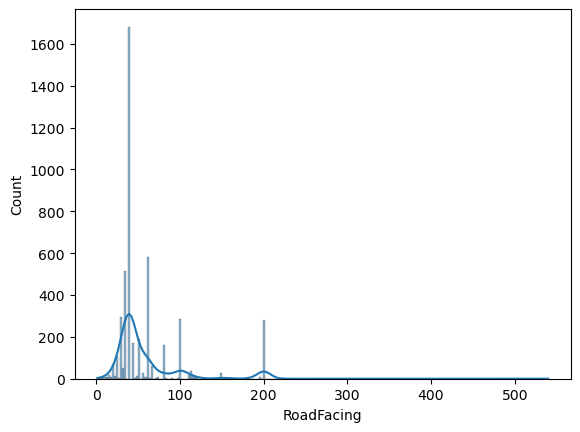

In [22]:
print(f"Skewness: { merged_df['RoadFacing'].skew() }")
sns.histplot(x = merged_df['RoadFacing'],kde=True)
plt.show()

Skewness: 0.9095030946644437


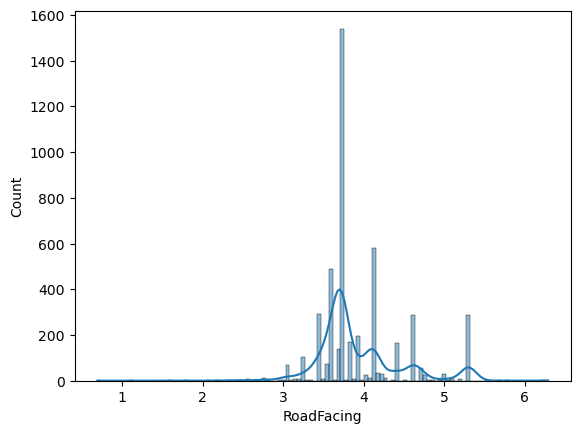

In [23]:
print(f"Skewness: { np.log1p(merged_df['RoadFacing']).skew() }")
sns.histplot(x = np.log1p(merged_df['RoadFacing']),kde=True)
plt.show()

In [24]:
merged_df['RoadFacing'].isna().sum()

3754

In [25]:
def sector_filt(sector):
    return merged_df[merged_df['Sector'] == sector][['Society','Sector','City']]

In [26]:
def society_filt(sector):
    return merged_df[merged_df['Society'] == sector][['Society','Sector','City']]

In [27]:
society_filt('MS Enclave')

,Society,Sector,City
1371,MS Enclave,Zirakpur,Mohali
1521,MS Enclave,Zirakpur,Mohali
1544,MS Enclave,Zirakpur,Mohali
2128,MS Enclave,Zirakpur,Mohali
2563,MS Enclave,Zirakpur,Mohali
3173,MS Enclave,Zirakpur,Mohali
7294,MS Enclave,Dhakoli,Mohali
8236,MS Enclave,Dhakoli,Mohali
8338,MS Enclave,Dhakoli,Mohali


In [28]:
temp_rows = society_filt('MS Enclave').index
for i in temp_rows:
    merged_df['Sector'].loc[i] = 'Dhakoli'

In [29]:
society_filt('MS Enclave')

,Society,Sector,City
1371,MS Enclave,Dhakoli,Mohali
1521,MS Enclave,Dhakoli,Mohali
1544,MS Enclave,Dhakoli,Mohali
2128,MS Enclave,Dhakoli,Mohali
2563,MS Enclave,Dhakoli,Mohali
3173,MS Enclave,Dhakoli,Mohali
7294,MS Enclave,Dhakoli,Mohali
8236,MS Enclave,Dhakoli,Mohali
8338,MS Enclave,Dhakoli,Mohali


In [64]:
#merged_df.to_csv("data/merged/houses-flats-v1.csv",index = False)

In [30]:
merged_df[merged_df['property_id'].duplicated()]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
7827,T76311771,2BHK 2Baths,Flat/Apartment,https://www.99acres.com/2-bhk-bedroom-apartmen...,NaN,Sector 61 Mohali,Mohali,"Mig flats, Sector 61 Mohali, Mohali, Punjab","Sector 61 Mohali, Mohali, Punjab","10,000 per sq.ft.",Carpet area: 1100 (102.19 sq.m.) sq.ft.,sq.ft.,2,2,3,"Study Room,Others",North-East,2,2,Park/Garden,Old,Vitrified,No,Unfurnished,0,1,25.0,Municipal corporation,Partial,Yes,Yes,Mig 2bhk 2nd floor corner facing park freehold...,NaN,"['Feng Shui / Vaastu Compliant', 'Park', 'Visi...",1.1000
7828,M76158461,2BHK 2Baths,Flat/Apartment,https://www.99acres.com/2-bhk-bedroom-apartmen...,NaN,Sector 61 Mohali,Mohali,"Chandigarh Housing Board Flat, Sector 61 Mohal...","Sector 61 Mohali, Mohali, Punjab","11,818 per sq.ft.",Carpet area: 1100 (102.19 sq.m.) sq.ft.,sq.ft.,2,2,3,"Pooja Room,Servant Room",North-East,1,2,Park/Garden,ModOld,Marble,No,Unfurnished,1,1,25.0,Municipal corporation,Partial,No,Yes,Freehold mig 2bhk 1st floor facing park availa...,NaN,"['Feng Shui / Vaastu Compliant', 'Park', 'Visi...",1.3000
8011,W76553903,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,Sushma Valencia,Zirakpur,Mohali,"Sushma Valencia, Gazipur, Mohali, Punjab","Gazipur, Mohali, Punjab","4,268 per sq.ft.",Super Built up area 1650(153.29 sq.m.)Built Up...,sq.ft.,3,3,3,"Study Room,Pooja Room,Servant Room,Store Room",East,1,4,"Club,Main Road,Others,Park/Garden,Pool",New,Marble,Yes,Semifurnished,1,1,40.0,"24*7 Water,Borewell/Tank,Municipal corporation",Full,Yes,Yes,Now just pay 10% and be a owner of our luxurio...,"['3 Wardrobe', '5 Light', '1 Modular Kitchen',...","['Security / Fire Alarm', 'Power Back-up', 'Fe...",0.7043


In [31]:
merged_df.drop_duplicates(subset=['property_id'],inplace = True)

In [32]:
merged_df.to_csv("data/merged/houses-flats-extra-address-v1.csv",index = False)